In [995]:
import numpy as np
import pandas as pd
import plotly.express as px

import calendar
from datetime import datetime

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

## 1.0 Global Data (Overview)

### 1.0.1 Global Quantities

In [409]:
df_global_q = pd.read_csv('Data/Global/global_exports_quantities.txt', delimiter='\t')
df_global_q.head()

,Exporters,"2010-Exported quantity, Tons","2011-Exported quantity, Tons","2012-Exported quantity, Tons","2013-Exported quantity, Tons","2014-Exported quantity, Tons","2015-Exported quantity, Tons","2016-Exported quantity, Tons","2017-Exported quantity, Tons","2018-Exported quantity, Tons","2019-Exported quantity, Tons","2020-Exported quantity, Tons","2021-Exported quantity, Tons",Unnamed: 13
0,World,1214351.0,1153849.0,1214137,1267952.0,1326425,1370772,1435756,1386312,1466019,No Quantity,No Quantity,No Quantity,NaN
1,Netherlands,138693.0,141021.0,172551,175908.0,181423,191954,228026,222106,218488,237042,251917,272105,NaN
2,Ireland,130068.0,138898.0,140547,152629.0,141914,176444,185560,198444,218804,257186,289292,272013,NaN
3,New Zealand,245393.0,254906.0,265711,259878.0,296759,291884,297476,269147,273223,280773,242003,241038,NaN
4,Germany,110900.0,89595.0,99833,122346.0,129422,135736,129008,125805,116785,135311,133137,129049,NaN


In [410]:
df_global_q.drop(df_global_q.filter(regex='^Unnamed').columns,axis=1,inplace=True)

# Remove the sum row 'World', the last row (blank) and the the last column (blank)
df_global_q = df_global_q[(df_global_q['Exporters'] != 'World')]

In [411]:
# Reshape the data, creating a row for each yearly observation
df_global_q = df_global_q.melt(id_vars=['Exporters'],
                               var_name='Year',
                               value_name='Quantity (tonnes)')

In [412]:
df_global_q

,Exporters,Year,Quantity (tonnes)
0,Netherlands,"2010-Exported quantity, Tons",138693.0
1,Ireland,"2010-Exported quantity, Tons",130068.0
2,New Zealand,"2010-Exported quantity, Tons",245393.0
3,Germany,"2010-Exported quantity, Tons",110900.0
4,Belgium,"2010-Exported quantity, Tons",74627.0
...,...,...,...
2083,Lesotho,"2021-Exported quantity, Tons",NaN
2084,Malawi,"2021-Exported quantity, Tons",NaN
2085,"Libya, State of","2021-Exported quantity, Tons",NaN
2086,Mali,"2021-Exported quantity, Tons",NaN


In [413]:
df_global_q['Year'] = df_global_q['Year'].str[:4]

In [414]:
df_global_q

,Exporters,Year,Quantity (tonnes)
0,Netherlands,2010,138693.0
1,Ireland,2010,130068.0
2,New Zealand,2010,245393.0
3,Germany,2010,110900.0
4,Belgium,2010,74627.0
...,...,...,...
2083,Lesotho,2021,NaN
2084,Malawi,2021,NaN
2085,"Libya, State of",2021,NaN
2086,Mali,2021,NaN


### 1.0.2 Global Values

In [415]:
df_global_v = pd.read_csv('Data/Global/global_exports_values.txt', delimiter='\t')
df_global_v

,Exporters,Exported value in 2010,Exported value in 2011,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019,Exported value in 2020,Exported value in 2021,Unnamed: 13
0,World,3802865.0,4405425.0,3740252.0,4428320.0,4548405.0,4285212.0,4518147.0,6418706.0,6946564.0,6660120.0,5599323.0,6463730.0,NaN
1,Netherlands,445281.0,550349.0,529077.0,650138.0,636885.0,604647.0,696832.0,998508.0,1034068.0,980831.0,893428.0,1061956.0,NaN
2,Ireland,405769.0,518267.0,422993.0,541223.0,488388.0,543733.0,544280.0,891261.0,1089962.0,1086854.0,969339.0,1051065.0,NaN
3,New Zealand,688911.0,1026562.0,715697.0,756614.0,888665.0,797983.0,833396.0,1197924.0,1212271.0,1132339.0,881204.0,988288.0,NaN
4,Germany,357912.0,353460.0,326588.0,450429.0,456993.0,429577.0,407033.0,595252.0,571646.0,560655.0,477357.0,532870.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Netherlands Antilles,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,"Libya, State of",0.0,NaN,NaN,NaN,NaN,31.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
172,Mali,0.0,0.0,3.0,NaN,NaN,NaN,0.0,11.0,40.0,44.0,NaN,NaN,NaN
173,Malawi,53.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,NaN,NaN


In [416]:
df_global_v.drop(df_global_v.filter(regex='^Unnamed').columns,axis=1,inplace=True)

# Remove the sum row 'World', the last row (blank) and the the last column (blank)
df_global_v = df_global_v[(df_global_v['Exporters'] != 'World')]

In [417]:
# Reshape the data, creating a row for each yearly observation
df_global_v = df_global_v.melt(id_vars=['Exporters'],
                               var_name='Year',
                               value_name='Value (k Euro)')

In [418]:
df_global_v['Year'] = df_global_v['Year'].str[-4:]

In [419]:
#df_global.sort_values(by=['Month Date','Value (k Euro)'],ascending=False,inplace=True)

### 1.0.3 Merge Global Quantities and Values

In [420]:
df_global = pd.merge(df_global_q,df_global_v,on=['Exporters','Year'], how='left')
df_global

,Exporters,Year,Quantity (tonnes),Value (k Euro)
0,Netherlands,2010,138693.0,445281.0
1,Ireland,2010,130068.0,405769.0
2,New Zealand,2010,245393.0,688911.0
3,Germany,2010,110900.0,357912.0
4,Belgium,2010,74627.0,261367.0
...,...,...,...,...
2083,Lesotho,2021,NaN,NaN
2084,Malawi,2021,NaN,NaN
2085,"Libya, State of",2021,NaN,NaN
2086,Mali,2021,NaN,NaN


In [421]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 0 to 2087
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Exporters          2088 non-null   object 
 1   Year               2088 non-null   object 
 2   Quantity (tonnes)  1872 non-null   object 
 3   Value (k Euro)     1872 non-null   float64
dtypes: float64(1), object(3)
memory usage: 81.6+ KB


In [422]:
# Remove rows where both quantity and value are null
df_global = df_global[(df_global['Quantity (tonnes)'].notna() & df_global['Value (k Euro)'].notna())]

In [423]:
# Check for nulls
df_global.isna().sum()

Exporters            0
Year                 0
Quantity (tonnes)    0
Value (k Euro)       0
dtype: int64

In [424]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 2057
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Exporters          1872 non-null   object 
 1   Year               1872 non-null   object 
 2   Quantity (tonnes)  1872 non-null   object 
 3   Value (k Euro)     1872 non-null   float64
dtypes: float64(1), object(3)
memory usage: 73.1+ KB


In [425]:
pd.options.mode.chained_assignment = None  # default='warn'
df_global['Quantity (tonnes)'] = df_global['Quantity (tonnes)'].apply(pd.to_numeric, errors='coerce')
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 2057
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Exporters          1872 non-null   object 
 1   Year               1872 non-null   object 
 2   Quantity (tonnes)  1858 non-null   float64
 3   Value (k Euro)     1872 non-null   float64
dtypes: float64(2), object(2)
memory usage: 73.1+ KB


In [426]:
# Check for nulls
df_global.isna().sum()

Exporters             0
Year                  0
Quantity (tonnes)    14
Value (k Euro)        0
dtype: int64

In [427]:
df_global[(df_global['Quantity (tonnes)'].isna())]

,Exporters,Year,Quantity (tonnes),Value (k Euro)
473,Viet Nam,2012,NaN,255.0
479,Bermuda,2012,NaN,1.0
794,Zimbabwe,2014,NaN,7.0
994,Nigeria,2015,NaN,6.0
1196,"Palestine, State of",2016,NaN,1.0
1370,"Palestine, State of",2017,NaN,10.0
1472,Namibia,2018,NaN,18.0
1576,United Kingdom,2019,NaN,183226.0
1658,Rwanda,2019,NaN,44.0
1876,Finland,2020,NaN,128984.0


In [428]:
# Use KNN Imputer to fill the missing values

column_names = ['Exporters','Year','Quantity (tonnes)','Value (k Euro)']

# Columns not included in KNN
fixed = np.array(df_global[column_names[:2]])
# Columns included in KNN
features = np.array(df_global[column_names[2:]])

impute_knn = KNNImputer(n_neighbors=1)
features = impute_knn.fit_transform(features)

full = np.append(fixed,features,axis=1)
df_global = pd.DataFrame(full,columns=['Exporters','Year','Quantity (tonnes)','Value (k Euro)'])

In [429]:
df_global

,Exporters,Year,Quantity (tonnes),Value (k Euro)
0,Netherlands,2010,138693.0,445281.0
1,Ireland,2010,130068.0,405769.0
2,New Zealand,2010,245393.0,688911.0
3,Germany,2010,110900.0,357912.0
4,Belgium,2010,74627.0,261367.0
...,...,...,...,...
1867,Suriname,2021,0.0,0.0
1868,Eswatini,2021,0.0,0.0
1869,Togo,2021,0.0,2.0
1870,United States Minor Outlying Islands,2021,0.0,1.0


### 1.0.4 Plot Global Data

In [430]:
# df_global.sort_values(by=['Year','Quantity (tonnes)'],ascending=[True,False],inplace=True)
fig = px.line(df_global, 
              x="Year", 
              y="Quantity (tonnes)", 
              color='Exporters', 
              title='Butter Export Quantities - All Countries')
fig.show()

In [431]:
# df_global.sort_values(by=['Year','Value (k Euro)'],ascending=False,inplace=True)
fig = px.line(df_global, 
              x='Year', 
              y='Value (k Euro)', 
              color='Exporters', 
              title='Butter Export Values - All Countries')
fig.show()

## 1.1 EU Data

In [432]:
# df_eu = pd.read_csv('Data/EU_MILK_trade_data_en.csv')
# df_eu.head()

# df = df_eu[(df_eu['Member State']=='Ireland') & 
#            (df_eu['Product Code (CN)'].astype('string').str[:5]=='40510') & 
#            (df_eu['Flow']=='EXPORT')]
# df

# df = df.groupby(['Flow','Partner','Month Date','Month','Marketing Year']).sum().reset_index()
# df

# df = df.groupby(['Marketing Year']).sum().reset_index()

# df[(df['Year'] = pd.DatetimeIndex(df_nz['Month Date']).year
    
# df_eu = df_eu[(df_eu['Product Code (CN)'].astype('string').str[:5]=='40510') & (df_eu['Flow']=='EXPORT')]

# df_eu.isna().sum()
    
# df_eu['Product Group'].unique()

# # Use lambda function to convert the Month Date values to datetime
# df_eu['Month Date'] = df_eu['Month Date'].map(lambda x: datetime.strptime(x, '%d/%m/%Y'))
    
# df_eu[(df_eu['Member State']=='Austria')]
    
# df_eu.rename(columns = {'Marketing Year':'Year', 
#                         'Member State':'Country',
#                         'Product Code (CN)':'Product',
#                         'Quantity in tonnes':'Quantity (tonnes)',
#                         'Value in thousand euro':'Value (k Euro)'
#                        }, inplace = True)
# df_eu.drop(['Month Order in MY','Product Group'], axis=1,inplace=True)

## 1.1 Ireland Data

In [433]:
ie_files = [
    {
        'filename':'Data/IE/ie_exports_quantities_01.txt',
        'filenames':['Data/IE/ie_exports_quantities_01.txt',
                    'Data/IE/ie_exports_quantities_02.txt',
                    'Data/IE/ie_exports_quantities_03.txt',
                    'Data/IE/ie_exports_quantities_04.txt',
                    'Data/IE/ie_exports_quantities_05.txt',
                    'Data/IE/ie_exports_quantities_06.txt',
                    'Data/IE/ie_exports_quantities_07.txt',
                    'Data/IE/ie_exports_quantities_08.txt',
                    'Data/IE/ie_exports_quantities_09.txt'],
        'partner_column':'Importers',
        'column_name':'Quantity in tonnes',
        'flow':'EXPORT',
        'left_date_text':'',
        'right_date_text':'-Exported quantity, Kilograms',
        'date_format':'%Y-M%m'
    },
    {
        'filename':'Data/IE/ie_exports_values_01.txt',
        'filenames':['Data/IE/ie_exports_values_01.txt',
                    'Data/IE/ie_exports_values_02.txt',
                    'Data/IE/ie_exports_values_03.txt',
                    'Data/IE/ie_exports_values_04.txt',
                    'Data/IE/ie_exports_values_05.txt',
                    'Data/IE/ie_exports_values_06.txt',
                    'Data/IE/ie_exports_values_07.txt',
                    'Data/IE/ie_exports_values_08.txt',
                    'Data/IE/ie_exports_values_09.txt'],
        'partner_column':'Importers',
        'column_name':'Value in thousand euro',
        'flow':'EXPORT',
        'left_date_text':'Exported value in ',
        'right_date_text':'',
        'date_format':'%Y-M%m'
    }
]

In [434]:
# df_ie = pd.read_csv('Data/IE/ie_exports_values_01.txt', delimiter='\t')
# df = pd.read_csv('Data/IE/ie_exports_quantities_04.txt', sep='\t', lineterminator='\r')
# df

In [435]:
first_quantity_data = True
first_value_data = True

partner_column_name = 'Partner'

for index in range(len(ie_files)):
    #df = pd.read_csv(nz_files[index]['filename'], sep='\t', lineterminator='\r')
    first_part = True
    for i in range(len(ie_files[index]['filenames'])):
        df_part = pd.read_csv(ie_files[index]['filenames'][i], sep='\t', lineterminator='\r')
#         print(df_part.head())
        key = ie_files[index]['partner_column']
        
        # Rename the 'Importers' / 'Exporters' column to 'Partner', in line with the EU data 
        df_part.rename(columns = {key:'Partner'}, inplace = True)
        #df_part.columns.values[key] = 'Partner'
        
        if first_part:
            df_parts = df_part
            first_part = False
        else:
            df_parts = df_parts.merge(df_part, on='Partner',how='left', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
            df_parts.drop(df_parts.filter(regex='^Unnamed').columns,axis=1,inplace=True)
            
            df_parts = df_parts[(df_parts['Partner'] != '\n')]
    
    # Start Here!
#     print(df_parts.head())
    for column in df_parts:
        if df_parts[column].name != 'Partner':
            pd.options.mode.chained_assignment = None  # default='warn'
            df_parts[column] = df_parts[column].apply(pd.to_numeric, errors='coerce')
            
        if df_parts[column].name.endswith('Tons'):
            # 1. Multiply tonnes by 1000 for kgs
            df_parts[column] = df_parts[column]*1000
            # 2. rename column, removing the last 5 characters and adding ' Kilograms'
            df_parts.rename(columns = {df_parts[column].name:df_parts[column].name[:-4]+'Kilograms'}, inplace = True)            

    # Convert Kilograms to Tonnes
#     df_parts.drop(df_parts.filter(regex='Unit$').columns,axis=1,inplace=True)
#     'Exported quantity, Kilograms'
#     print(df_parts.head())
    df = df_parts
        
    # Use lambda function to strip unwanted characters from beginning (lstrip) 
    # and end (rstrip) of the Importers values
    df['Partner'] = df['Partner'].map(lambda x: x.lstrip('\n"').rstrip('"'))
    
    # Remove the sum row 'World', the last row (blank) and the the last column (blank)
    df = df[(df['Partner'] != 'World')]
    
    # Reshape the data, creating a row for each monthly observation
    df = df.melt(id_vars=['Partner'], var_name='Month Date', value_name=ie_files[index]['column_name'])
    
    # Add a 'Flow' column to indicate IMPORT or EXPORT
#    df['Flow'] = ie_files[index]['flow']
    
    # Use lambda function to strip unwanted text and convert Month Date values to datetime
    df['Month Date'] = df['Month Date'].map(lambda x: x.lstrip(ie_files[index]['left_date_text']).rstrip(ie_files[index]['right_date_text']))
    df['Month Date'] = df['Month Date'].map(lambda x: datetime.strptime(x, ie_files[index]['date_format']))

    if ie_files[index]['column_name'] == 'Value in thousand euro':
        if first_value_data:
            df_values = df
            first_value_data = False
        else:
            df_values = pd.concat([df_values,df],ignore_index=True)
    else:
        if first_quantity_data:
            df_quantities = df
            first_quantity_data = False
        else:
            df_quantities = pd.concat([df_quantities,df],ignore_index=True)
 
    
    
df_ie = pd.merge(df_values,
                 df_quantities[['Month Date','Partner','Quantity in tonnes']],
                 on=['Month Date','Partner'], 
                 how='left')
df_ie

,Partner,Month Date,Value in thousand euro,Quantity in tonnes
0,United Kingdom,2008-07-01,9912.0,3136000.0
1,Germany,2008-07-01,6706.0,2321000.0
2,France,2008-07-01,2500.0,909000.0
3,Belgium,2008-07-01,8975.0,2916000.0
4,Denmark,2008-07-01,0.0,0.0
...,...,...,...,...
9971,Special categories,2022-10-01,NaN,NaN
9972,United States of America,2022-10-01,25247.0,2217620.0
9973,United States Minor Outlying Islands,2022-10-01,NaN,NaN
9974,Uzbekistan,2022-10-01,NaN,NaN


In [436]:
df_ie['Year'] = pd.DatetimeIndex(df_ie['Month Date']).year
df_ie['Month'] = pd.DatetimeIndex(df_ie['Month Date']).month
df_ie['Month'] = df_ie['Month'].apply(lambda x: calendar.month_abbr[x])

In [437]:
df_ie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9975
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Partner                 9976 non-null   object        
 1   Month Date              9976 non-null   datetime64[ns]
 2   Value in thousand euro  8057 non-null   float64       
 3   Quantity in tonnes      8055 non-null   float64       
 4   Year                    9976 non-null   int64         
 5   Month                   9976 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 545.6+ KB


In [438]:
# pd.options.mode.chained_assignment = None  # default='warn'
# df_ie['Quantity (tonnes)'] = df_ie['Quantity (tonnes)'].apply(pd.to_numeric, errors='coerce')
# df_ie.info()

In [439]:
df_ie.rename(columns = {
                        'Quantity in tonnes':'Quantity (tonnes)',
                        'Value in thousand euro':'Value (k Euro)'
                       }, inplace = True)
df_ie['Quantity (tonnes)'] = df_ie['Quantity (tonnes)'] / 1000

In [440]:
df_ie['Country'] = 'Ireland'

In [441]:
df_ie

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country
0,United Kingdom,2008-07-01,9912.0,3136.00,2008,Jul,Ireland
1,Germany,2008-07-01,6706.0,2321.00,2008,Jul,Ireland
2,France,2008-07-01,2500.0,909.00,2008,Jul,Ireland
3,Belgium,2008-07-01,8975.0,2916.00,2008,Jul,Ireland
4,Denmark,2008-07-01,0.0,0.00,2008,Jul,Ireland
...,...,...,...,...,...,...,...
9971,Special categories,2022-10-01,NaN,NaN,2022,Oct,Ireland
9972,United States of America,2022-10-01,25247.0,2217.62,2022,Oct,Ireland
9973,United States Minor Outlying Islands,2022-10-01,NaN,NaN,2022,Oct,Ireland
9974,Uzbekistan,2022-10-01,NaN,NaN,2022,Oct,Ireland


## 1.2 Netherlands Data

In [442]:
nl_files = [
    {
        'filename':'Data/NL/nl_exports_quantities_01.txt',
        'filenames':['Data/NL/nl_exports_quantities_01.txt',
                    'Data/NL/nl_exports_quantities_02.txt',
                    'Data/NL/nl_exports_quantities_03.txt',
                    'Data/NL/nl_exports_quantities_04.txt',
                    'Data/NL/nl_exports_quantities_05.txt',
                    'Data/NL/nl_exports_quantities_06.txt',
                    'Data/NL/nl_exports_quantities_07.txt',
                    'Data/NL/nl_exports_quantities_08.txt'],
        'partner_column':'Importers',
        'column_name':'Quantity in tonnes',
        'flow':'EXPORT',
        'left_date_text':'',
        'right_date_text':'-Exported quantity, Kilograms',
        'date_format':'%Y-M%m'
    },
    {
        'filename':'Data/NL/nl_exports_values_01.txt',
        'filenames':['Data/NL/nl_exports_values_01.txt',
                    'Data/NL/nl_exports_values_02.txt',
                    'Data/NL/nl_exports_values_03.txt',
                    'Data/NL/nl_exports_values_04.txt',
                    'Data/NL/nl_exports_values_05.txt',
                    'Data/NL/nl_exports_values_06.txt',
                    'Data/NL/nl_exports_values_07.txt',
                    'Data/NL/nl_exports_values_08.txt'],
        'partner_column':'Importers',
        'column_name':'Value in thousand euro',
        'flow':'EXPORT',
        'left_date_text':'Exported value in ',
        'right_date_text':'',
        'date_format':'%Y-M%m'
    }
]

In [443]:
first_quantity_data = True
first_value_data = True

partner_column_name = 'Partner'

for index in range(len(nl_files)):
    
    first_part = True
    for i in range(len(nl_files[index]['filenames'])):
        df_part = pd.read_csv(nl_files[index]['filenames'][i], sep='\t', lineterminator='\r')
        key = nl_files[index]['partner_column']
        
        # Rename the 'Importers' / 'Exporters' column to 'Partner', in line with the EU data 
        df_part.rename(columns = {key:'Partner'}, inplace = True)
        
        if first_part:
            df_parts = df_part
            first_part = False
        else:
            df_parts = df_parts.merge(df_part, on='Partner',how='left', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
            df_parts.drop(df_parts.filter(regex='^Unnamed').columns,axis=1,inplace=True)
            
            df_parts = df_parts[(df_parts['Partner'] != '\n')]
    print(df_parts.head())    
   
    for column in df_parts:
        if df_parts[column].name != 'Partner':
            pd.options.mode.chained_assignment = None  # default='warn'
            df_parts[column] = df_parts[column].apply(pd.to_numeric, errors='coerce')
        
        if df_parts[column].name.endswith('Tons'):
            # 1. Multiply tonnes by 1000 for kgs
            df_parts[column] = df_parts[column]*1000
            # 2. rename column, removing the last 5 characters and adding ' Kilograms'
            df_parts.rename(columns = {df_parts[column].name:df_parts[column].name[:-4]+'Kilograms'}, inplace = True)            
     
    df = df_parts
     
    # Use lambda function to strip unwanted characters from beginning (lstrip) 
    # and end (rstrip) of the Importers values
    df['Partner'] = df['Partner'].map(lambda x: x.lstrip('\n"').rstrip('"'))
    
    # Remove the sum row 'World', the last row (blank) and the the last column (blank)
    df = df[(df['Partner'] != 'World')]
    
    
    # Reshape the data, creating a row for each monthly observation
    df = df.melt(id_vars=['Partner'], var_name='Month Date', value_name=nl_files[index]['column_name'])
    
    # Use lambda function to strip unwanted text and convert Month Date values to datetime
    df['Month Date'] = df['Month Date'].map(lambda x: x.lstrip(nl_files[index]['left_date_text']).rstrip(nl_files[index]['right_date_text']))
    df['Month Date'] = df['Month Date'].map(lambda x: datetime.strptime(x, nl_files[index]['date_format']))

    if nl_files[index]['column_name'] == 'Value in thousand euro':
        if first_value_data:
            df_values = df
            first_value_data = False
        else:
            df_values = pd.concat([df_values,df],ignore_index=True)
    else:
        if first_quantity_data:
            df_quantities = df
            first_quantity_data = False
        else:
            df_quantities = pd.concat([df_quantities,df],ignore_index=True)  
    
df_nl = pd.merge(df_values,
                 df_quantities[['Month Date','Partner','Quantity in tonnes']],
                 on=['Month Date','Partner'], 
                 how='left')
df_nl

         Partner 2010-M01-Exported quantity, Tons  \
0      \n"World"                            10960   
1    \n"Belgium"                             1036   
2     \n"France"                             2127   
3    \n"Germany"                             2919   
4  \n"Singapore"                              675   

   2010-M02-Exported quantity, Tons 2010-M03-Exported quantity, Tons  \
0                            9869.0                            11193   
1                            1181.0                             1876   
2                            2304.0                             2267   
3                            2239.0                             2764   
4                               0.0                              225   

   2010-M04-Exported quantity, Tons 2010-M05-Exported quantity, Tons  \
0                           11721.0                            11507   
1                            2151.0                             3008   
2                            289

,Partner,Month Date,Value in thousand euro,Quantity in tonnes
0,Belgium,2010-01-01,3005.0,1036000.0
1,France,2010-01-01,6139.0,2127000.0
2,Germany,2010-01-01,7772.0,2919000.0
3,Singapore,2010-01-01,1670.0,675000.0
4,Italy,2010-01-01,529.0,181000.0
...,...,...,...,...
18167,Switzerland,2022-09-01,2243.0,316025.0
18168,Burkina Faso,2022-09-01,0.0,0.0
18169,Uzbekistan,2022-09-01,0.0,0.0
18170,"Venezuela, Bolivarian Republic of",2022-09-01,NaN,NaN


In [444]:
df_nl['Year'] = pd.DatetimeIndex(df_nl['Month Date']).year
df_nl['Month'] = pd.DatetimeIndex(df_nl['Month Date']).month
df_nl['Month'] = df_nl['Month'].apply(lambda x: calendar.month_abbr[x])

In [445]:
df_nl.rename(columns = {
                        'Quantity in tonnes':'Quantity (tonnes)',
                        'Value in thousand euro':'Value (k Euro)'
                       }, inplace = True)
df_nl['Quantity (tonnes)'] = df_nl['Quantity (tonnes)'] / 1000

In [446]:
df_nl['Country'] = 'Netherlands'

In [447]:
df_nl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18172 entries, 0 to 18171
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Partner            18172 non-null  object        
 1   Month Date         18172 non-null  datetime64[ns]
 2   Value (k Euro)     15170 non-null  float64       
 3   Quantity (tonnes)  15135 non-null  float64       
 4   Year               18172 non-null  int64         
 5   Month              18172 non-null  object        
 6   Country            18172 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.1+ MB


## 1.3 NewZealand Data

In [448]:
nz_files = [
    {
        'filename':'Data/NZ/nz_exports_quantities_01.txt',
        'filenames':['Data/NZ/nz_exports_quantities_01.txt',
                    'Data/NZ/nz_exports_quantities_02.txt',
                    'Data/NZ/nz_exports_quantities_03.txt',
                    'Data/NZ/nz_exports_quantities_04.txt',
                    'Data/NZ/nz_exports_quantities_05.txt',
                    'Data/NZ/nz_exports_quantities_06.txt',
                    'Data/NZ/nz_exports_quantities_07.txt',
                    'Data/NZ/nz_exports_quantities_08.txt'],
        'partner_column':'Importers',
        'column_name':'Quantity in tonnes',
        'flow':'EXPORT',
        'left_date_text':'',
        'right_date_text':'%Y-M%m-Exported quantity, Kilograms',
        'date_format':'%Y-M%m'
    },
    {
        'filename':'Data/NZ/nz_exports_values_01.txt',
        'filenames':['Data/NZ/nz_exports_values_01.txt',
                    'Data/NZ/nz_exports_values_02.txt',
                    'Data/NZ/nz_exports_values_03.txt',
                    'Data/NZ/nz_exports_values_04.txt',
                    'Data/NZ/nz_exports_values_05.txt',
                    'Data/NZ/nz_exports_values_06.txt',
                    'Data/NZ/nz_exports_values_07.txt',
                    'Data/NZ/nz_exports_values_08.txt'],
        'partner_column':'Importers',
        'column_name':'Value in thousand euro',
        'flow':'EXPORT',
        'left_date_text':'Exported value in ',
        'right_date_text':'',
        'date_format':'%Y-M%m'
    }
#     {
#         'filename':'Data/NZ/nz_imports_quantities_01.txt',
#         'filenames':['Data/NZ/nz_imports_quantities_01.txt',
#                     'Data/NZ/nz_imports_quantities_02.txt',
#                     'Data/NZ/nz_imports_quantities_03.txt',
#                     'Data/NZ/nz_imports_quantities_04.txt',
#                     'Data/NZ/nz_imports_quantities_05.txt',
#                     'Data/NZ/nz_imports_quantities_06.txt',
#                     'Data/NZ/nz_imports_quantities_07.txt',
#                     'Data/NZ/nz_imports_quantities_08.txt'],
#         'partner_column':'Exporters',
#         'column_name':'Quantity in tonnes',
#         'flow':'IMPORT',
#         'left_date_text':'',
#         'right_date_text':'-Imported quantity, Kilograms',
#         'date_format':'%Y-M%m'
#     },
#     {
#         'filename':'Data/NZ/nz_imports_values_01.txt',
#         'filenames':['Data/NZ/nz_imports_values_01.txt',
#                     'Data/NZ/nz_imports_values_02.txt',
#                     'Data/NZ/nz_imports_values_03.txt',
#                     'Data/NZ/nz_imports_values_04.txt',
#                     'Data/NZ/nz_imports_values_05.txt',
#                     'Data/NZ/nz_imports_values_06.txt',
#                     'Data/NZ/nz_imports_values_07.txt',
#                     'Data/NZ/nz_imports_values_08.txt'],
#         'partner_column':'Exporters',
#         'column_name':'Value in thousand euro',
#         'flow':'IMPORT',
#         'left_date_text':'Imported value in ',
#         'right_date_text':'',
#         'date_format':'%Y-M%m'
#     }
]

In [449]:
first_quantity_data = True
first_value_data = True

partner_column_name = 'Partner'

for index in range(len(nz_files)):
    #df = pd.read_csv(nz_files[index]['filename'], sep='\t', lineterminator='\r')
    first_part = True
    for i in range(len(nz_files[index]['filenames'])):
        df_part = pd.read_csv(nz_files[index]['filenames'][i], sep='\t', lineterminator='\r')
        key = nz_files[index]['partner_column']
        
        # Rename the 'Importers' / 'Exporters' column to 'Partner', in line with the EU data 
        df_part.rename(columns = {key:'Partner'}, inplace = True)
        #df_part.columns.values[key] = 'Partner'
        
        if first_part:
            df_parts = df_part
            first_part = False
        else:
            df_parts = df_parts.merge(df_part, on='Partner',how='left', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
            df_parts.drop(df_parts.filter(regex='^Unnamed').columns,axis=1,inplace=True)
            df_parts = df_parts[(df_parts['Partner'] != '\n')]
                   
    df = df_parts
    
    # Use lambda function to strip unwanted characters from beginning (lstrip) 
    # and end (rstrip) of the Importers values
    df['Partner'] = df['Partner'].map(lambda x: x.lstrip('\n"').rstrip('"'))
    
    # Remove the sum row 'World', the last row (blank) and the the last column (blank)
    df = df[(df['Partner'] != 'World')]
    
    # Reshape the data, creating a row for each monthly observation
    df = df.melt(id_vars=['Partner'], var_name='Month Date', value_name=nz_files[index]['column_name'])
    
    # Add a 'Flow' column to indicate IMPORT or EXPORT
#     df['Flow'] = nz_files[index]['flow']
    
    
    # Use lambda function to strip unwanted text and convert Month Date values to datetime
    df['Month Date'] = df['Month Date'].map(lambda x: x.lstrip(nz_files[index]['left_date_text']).rstrip(nz_files[index]['right_date_text']))
    df['Month Date'] = df['Month Date'].map(lambda x: datetime.strptime(x, nz_files[index]['date_format']))
    
    if nz_files[index]['column_name'] == 'Value in thousand euro':
        if first_value_data:
            df_values = df
            first_value_data = False
        else:
            df_values = pd.concat([df_values,df],ignore_index=True)
    else:
        if first_quantity_data:
            df_quantities = df
            first_quantity_data = False
        else:
            df_quantities = pd.concat([df_quantities,df],ignore_index=True)
    
    
df_nz = pd.merge(df_values,
                 df_quantities[['Month Date','Partner','Quantity in tonnes']],
                 on=['Month Date','Partner'], 
                 how='left')
df_nz

,Partner,Month Date,Value in thousand euro,Quantity in tonnes
0,Denmark,2010-01-01,8271.0,4332245.0
1,Russian Federation,2010-01-01,5504.0,2008407.0
2,Morocco,2010-01-01,4296.0,2334257.0
3,China,2010-01-01,3211.0,1578730.0
4,Australia,2010-01-01,4608.0,2219114.0
...,...,...,...,...
15907,Cambodia,2022-09-01,61.0,7586.0
15908,Cayman Islands,2022-09-01,NaN,NaN
15909,Argentina,2022-09-01,NaN,NaN
15910,Algeria,2022-09-01,0.0,0.0


In [450]:
df_nz['Year'] = pd.DatetimeIndex(df_nz['Month Date']).year
df_nz['Month'] = pd.DatetimeIndex(df_nz['Month Date']).month
df_nz['Month'] = df_nz['Month'].apply(lambda x: calendar.month_abbr[x])

In [451]:
df_nz.head()

,Partner,Month Date,Value in thousand euro,Quantity in tonnes,Year,Month
0,Denmark,2010-01-01,8271.0,4332245.0,2010,Jan
1,Russian Federation,2010-01-01,5504.0,2008407.0,2010,Jan
2,Morocco,2010-01-01,4296.0,2334257.0,2010,Jan
3,China,2010-01-01,3211.0,1578730.0,2010,Jan
4,Australia,2010-01-01,4608.0,2219114.0,2010,Jan


In [452]:
df_nz.rename(columns = {
                        'Quantity in tonnes':'Quantity (tonnes)',
                        'Value in thousand euro':'Value (k Euro)'
                       }, inplace = True)
df_nz['Quantity (tonnes)'] = df_nz['Quantity (tonnes)'] / 1000

In [453]:
df_nz['Country'] = 'New Zealand'

In [454]:
df_nz

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country
0,Denmark,2010-01-01,8271.0,4332.245,2010,Jan,New Zealand
1,Russian Federation,2010-01-01,5504.0,2008.407,2010,Jan,New Zealand
2,Morocco,2010-01-01,4296.0,2334.257,2010,Jan,New Zealand
3,China,2010-01-01,3211.0,1578.730,2010,Jan,New Zealand
4,Australia,2010-01-01,4608.0,2219.114,2010,Jan,New Zealand
...,...,...,...,...,...,...,...
15907,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand
15908,Cayman Islands,2022-09-01,NaN,NaN,2022,Sep,New Zealand
15909,Argentina,2022-09-01,NaN,NaN,2022,Sep,New Zealand
15910,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand


### Trim unmatched observations from both ends of the sets

In [467]:
common_start_date = max([df_ie['Month Date'].min(),df_nl['Month Date'].min(),df_nz['Month Date'].min()])

In [473]:
df_ie = df_ie[(df_ie['Month Date']>=common_start_date)]
df_nl = df_nl[(df_nl['Month Date']>=common_start_date)]
df_nz = df_nz[(df_nz['Month Date']>=common_start_date)]

In [474]:
common_end_date = min([df_ie['Month Date'].max(),df_nl['Month Date'].max(),df_nz['Month Date'].max()])

In [479]:
df_ie = df_ie[(df_ie['Month Date']<=common_end_date)]
df_nl = df_nl[(df_nl['Month Date']<=common_end_date)]
df_nz = df_nz[(df_nz['Month Date']<=common_end_date)]

In [481]:
df_nl

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country
0,Belgium,2010-01-01,3005.0,1036.000,2010,Jan,Netherlands
1,France,2010-01-01,6139.0,2127.000,2010,Jan,Netherlands
2,Germany,2010-01-01,7772.0,2919.000,2010,Jan,Netherlands
3,Singapore,2010-01-01,1670.0,675.000,2010,Jan,Netherlands
4,Italy,2010-01-01,529.0,181.000,2010,Jan,Netherlands
...,...,...,...,...,...,...,...
18167,Switzerland,2022-09-01,2243.0,316.025,2022,Sep,Netherlands
18168,Burkina Faso,2022-09-01,0.0,0.000,2022,Sep,Netherlands
18169,Uzbekistan,2022-09-01,0.0,0.000,2022,Sep,Netherlands
18170,"Venezuela, Bolivarian Republic of",2022-09-01,NaN,NaN,2022,Sep,Netherlands


## 1.3 Combine Data


In [926]:
df_all = pd.concat([df_ie,df_nl,df_nz],ignore_index=True)

In [927]:
# df_nz = df_nz[['Country','Flow','Partner','Month Date','Month','Year','Quantity (tonnes)','Value (k Euro)']]

In [928]:
df_all

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country
0,United Kingdom,2010-01-01,8328.0,2695.000,2010,Jan,Ireland
1,Germany,2010-01-01,3223.0,1607.000,2010,Jan,Ireland
2,France,2010-01-01,1703.0,613.000,2010,Jan,Ireland
3,Belgium,2010-01-01,826.0,224.000,2010,Jan,Ireland
4,Denmark,2010-01-01,0.0,0.000,2010,Jan,Ireland
...,...,...,...,...,...,...,...
42953,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand
42954,Cayman Islands,2022-09-01,NaN,NaN,2022,Sep,New Zealand
42955,Argentina,2022-09-01,NaN,NaN,2022,Sep,New Zealand
42956,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand


In [929]:
ignore_list = ['Special categories', 'United States Minor Outlying Islands', 
               'Taipei, Chinese', 'Ship stores and bunkers','Netherlands Antilles', 
               'Cook Islands', 'Wallis and Futuna Islands', 'Niue', 'Norfolk Island']
df_all = df_all.query('Partner not in @ignore_list')

### Check data quality

In [930]:
df_all.isna().sum()

Partner                 0
Month Date              0
Value (k Euro)       6691
Quantity (tonnes)    6728
Year                    0
Month                   0
Country                 0
dtype: int64

In [931]:
df_all[(df_all['Quantity (tonnes)'].notna()) & (df_all['Value (k Euro)'].isna())]

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country


In [932]:
df_all[(df_all['Quantity (tonnes)'].isna() & df_all['Value (k Euro)'].isna())]

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country
140,Australia,2010-03-01,NaN,NaN,2010,Mar,Ireland
144,"Hong Kong, China",2010-03-01,NaN,NaN,2010,Mar,Ireland
150,Kazakhstan,2010-03-01,NaN,NaN,2010,Mar,Ireland
153,Maldives,2010-03-01,NaN,NaN,2010,Mar,Ireland
157,Oman,2010-03-01,NaN,NaN,2010,Mar,Ireland
...,...,...,...,...,...,...,...
42945,Finland,2022-09-01,NaN,NaN,2022,Sep,New Zealand
42946,Djibouti,2022-09-01,NaN,NaN,2022,Sep,New Zealand
42948,Germany,2022-09-01,NaN,NaN,2022,Sep,New Zealand
42954,Cayman Islands,2022-09-01,NaN,NaN,2022,Sep,New Zealand


In [933]:
# Remove rows where both quantity and value are null
df_all = df_all[(df_all['Quantity (tonnes)'].notna() & df_all['Value (k Euro)'].notna())]

In [934]:
df_all.isna().sum()

Partner              0
Month Date           0
Value (k Euro)       0
Quantity (tonnes)    0
Year                 0
Month                0
Country              0
dtype: int64

### Add Country Codes

In [935]:
df_pop = pd.read_csv('Data/Populations/populations_to_2025.csv')
df_pop = df_pop[:-5]
df_pop.rename(columns = {'Country Name':'Partner', 'Country Code':'Partner Code'}, inplace = True)
df_pop.head(3)

,Partner,Partner Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],2025 [YR2025]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,28189672,29249157,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854,43372950,44515793
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,523459657,537792950,552530654,567891875,583650827,600008150,616377331,632746296,649756874,667242712,685112705,702976832,720843207,739095988,757846442,776925275
2,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,356337762,366489204,376797999,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,502789511,515512883,528457248


### Add Country Codes to df_all

In [936]:
df_countries = df_pop[['Partner','Partner Code']]
# df_countries.rename(columns = {'Country Name':'Partner', 'Country Code':'Partner Code'}, inplace = True)

In [937]:
df_countries

,Partner,Partner Code
0,Afghanistan,AFG
1,Africa Eastern and Southern,AFE
2,Africa Western and Central,AFW
3,Albania,ALB
4,Algeria,DZA
...,...,...
261,West Bank and Gaza,PSE
262,World,WLD
263,Yemen,YEM
264,Zambia,ZMB


In [938]:
df_all

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country
0,United Kingdom,2010-01-01,8328.0,2695.000,2010,Jan,Ireland
1,Germany,2010-01-01,3223.0,1607.000,2010,Jan,Ireland
2,France,2010-01-01,1703.0,613.000,2010,Jan,Ireland
3,Belgium,2010-01-01,826.0,224.000,2010,Jan,Ireland
4,Denmark,2010-01-01,0.0,0.000,2010,Jan,Ireland
...,...,...,...,...,...,...,...
42951,Brunei Darussalam,2022-09-01,0.0,0.000,2022,Sep,New Zealand
42952,Belize,2022-09-01,0.0,0.000,2022,Sep,New Zealand
42953,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand
42956,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand


In [939]:
df_all = pd.merge(df_all,df_countries[['Partner','Partner Code']],on='Partner', how='left')

In [940]:
df_all

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country,Partner Code
0,United Kingdom,2010-01-01,8328.0,2695.000,2010,Jan,Ireland,GBR
1,Germany,2010-01-01,3223.0,1607.000,2010,Jan,Ireland,DEU
2,France,2010-01-01,1703.0,613.000,2010,Jan,Ireland,FRA
3,Belgium,2010-01-01,826.0,224.000,2010,Jan,Ireland,BEL
4,Denmark,2010-01-01,0.0,0.000,2010,Jan,Ireland,DNK
...,...,...,...,...,...,...,...,...
34078,Brunei Darussalam,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BRN
34079,Belize,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BLZ
34080,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand,KHM
34081,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand,DZA


### Add population data to df_all

In [941]:
df_pop

,Partner,Partner Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],2025 [YR2025]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,28189672,29249157,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854,43372950,44515793
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,523459657,537792950,552530654,567891875,583650827,600008150,616377331,632746296,649756874,667242712,685112705,702976832,720843207,739095988,757846442,776925275
2,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,356337762,366489204,376797999,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,502789511,515512883,528457248
3,Albania,ALB,"Population, total",SP.POP.TOTL,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2800251,2790947,2785660,2780047
4,Algeria,DZA,"Population, total",SP.POP.TOTL,35856344,36543541,37260563,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969,44903225,45606480,46278751,46922031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,3786161,3882986,3979998,4076708,4173398,4270092,4367088,4454805,4569087,4685306,4803269,4922749,5036542,5152174,5270826,5390068
262,World,WLD,"Population, total",SP.POP.TOTL,6969631901,7053533350,7140895722,7229184551,7317508753,7404910892,7491934113,7578157615,7661776338,7742681934,7820981524,7888408686,7953784126,8024502275,8097917317,8170758463
263,Yemen,YEM,"Population, total",SP.POP.TOTL,24743946,25475610,26223391,26984002,27753304,28516545,29274002,30034389,30790513,31546691,32284046,32981641,33696614,34449825,35219853,36000452
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,13792086,14265814,14744658,15234976,15737793,16248230,16767761,17298054,17835893,18380477,18927715,19473125,20017675,20569737,21134695,21706928


In [942]:
df_pop.drop(['Series Name','Series Code','Partner'],axis=1,inplace=True)
df_pop

,Partner Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],2025 [YR2025]
0,AFG,28189672,29249157,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854,43372950,44515793
1,AFE,523459657,537792950,552530654,567891875,583650827,600008150,616377331,632746296,649756874,667242712,685112705,702976832,720843207,739095988,757846442,776925275
2,AFW,356337762,366489204,376797999,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,502789511,515512883,528457248
3,ALB,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2800251,2790947,2785660,2780047
4,DZA,35856344,36543541,37260563,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969,44903225,45606480,46278751,46922031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,PSE,3786161,3882986,3979998,4076708,4173398,4270092,4367088,4454805,4569087,4685306,4803269,4922749,5036542,5152174,5270826,5390068
262,WLD,6969631901,7053533350,7140895722,7229184551,7317508753,7404910892,7491934113,7578157615,7661776338,7742681934,7820981524,7888408686,7953784126,8024502275,8097917317,8170758463
263,YEM,24743946,25475610,26223391,26984002,27753304,28516545,29274002,30034389,30790513,31546691,32284046,32981641,33696614,34449825,35219853,36000452
264,ZMB,13792086,14265814,14744658,15234976,15737793,16248230,16767761,17298054,17835893,18380477,18927715,19473125,20017675,20569737,21134695,21706928


In [943]:
df_pop = df_pop.melt(id_vars=['Partner Code'],
                               var_name='Year',
                               value_name='Population')
df_pop

,Partner Code,Year,Population
0,AFG,2010 [YR2010],28189672
1,AFE,2010 [YR2010],523459657
2,AFW,2010 [YR2010],356337762
3,ALB,2010 [YR2010],2913021
4,DZA,2010 [YR2010],35856344
...,...,...,...
4251,PSE,2025 [YR2025],5390068
4252,WLD,2025 [YR2025],8170758463
4253,YEM,2025 [YR2025],36000452
4254,ZMB,2025 [YR2025],21706928


In [944]:
df_pop['Year'] = df_pop['Year'].str[:4]
df_pop

,Partner Code,Year,Population
0,AFG,2010,28189672
1,AFE,2010,523459657
2,AFW,2010,356337762
3,ALB,2010,2913021
4,DZA,2010,35856344
...,...,...,...
4251,PSE,2025,5390068
4252,WLD,2025,8170758463
4253,YEM,2025,36000452
4254,ZMB,2025,21706928


In [945]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34083 entries, 0 to 34082
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Partner            34083 non-null  object        
 1   Month Date         34083 non-null  datetime64[ns]
 2   Value (k Euro)     34083 non-null  float64       
 3   Quantity (tonnes)  34083 non-null  float64       
 4   Year               34083 non-null  int64         
 5   Month              34083 non-null  object        
 6   Country            34083 non-null  object        
 7   Partner Code       34083 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.3+ MB


In [946]:
df_pop['Year'] = df_pop['Year'].astype('int64')
# df_pop['Population'] = df_pop['Population'].astype('float')

In [947]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Partner Code  4256 non-null   object
 1   Year          4256 non-null   int64 
 2   Population    4256 non-null   object
dtypes: int64(1), object(2)
memory usage: 99.9+ KB


In [948]:
df_temp = df_all.merge(df_pop, how='left', on=['Partner Code','Year'])
df_temp

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country,Partner Code,Population
0,United Kingdom,2010-01-01,8328.0,2695.000,2010,Jan,Ireland,GBR,62766365
1,Germany,2010-01-01,3223.0,1607.000,2010,Jan,Ireland,DEU,81776930
2,France,2010-01-01,1703.0,613.000,2010,Jan,Ireland,FRA,65030575
3,Belgium,2010-01-01,826.0,224.000,2010,Jan,Ireland,BEL,10895586
4,Denmark,2010-01-01,0.0,0.000,2010,Jan,Ireland,DNK,5547683
...,...,...,...,...,...,...,...,...,...
34078,Brunei Darussalam,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BRN,449002
34079,Belize,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BLZ,405272
34080,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand,KHM,16767842
34081,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand,DZA,44903225


In [949]:
df_temp[(df_temp['Partner Code'].isna())]['Partner'].unique()

array([], dtype=object)

In [950]:
df_temp[(df_temp['Partner'].str.contains('Mold'))]['Partner'].unique()

array(['Moldova, Republic of'], dtype=object)

In [951]:
df_all = df_temp

### Add Features

## 2.1 Plot

In [952]:
#df_all.groupby([pd.Grouper(key='Month Date',freq='3M'),'Country']).sum().reset_index()
#calculate sum of sales, grouped by quarter
#df_all.groupby(df_all['Country','Month Date'].dt.to_period('Q'))['Value (k Euro)','Quantity (tonnes)'].sum()

In [953]:
df_all

,Partner,Month Date,Value (k Euro),Quantity (tonnes),Year,Month,Country,Partner Code,Population
0,United Kingdom,2010-01-01,8328.0,2695.000,2010,Jan,Ireland,GBR,62766365
1,Germany,2010-01-01,3223.0,1607.000,2010,Jan,Ireland,DEU,81776930
2,France,2010-01-01,1703.0,613.000,2010,Jan,Ireland,FRA,65030575
3,Belgium,2010-01-01,826.0,224.000,2010,Jan,Ireland,BEL,10895586
4,Denmark,2010-01-01,0.0,0.000,2010,Jan,Ireland,DNK,5547683
...,...,...,...,...,...,...,...,...,...
34078,Brunei Darussalam,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BRN,449002
34079,Belize,2022-09-01,0.0,0.000,2022,Sep,New Zealand,BLZ,405272
34080,Cambodia,2022-09-01,61.0,7.586,2022,Sep,New Zealand,KHM,16767842
34081,Algeria,2022-09-01,0.0,0.000,2022,Sep,New Zealand,DZA,44903225


In [954]:
df_plot = df_all.copy() # Use deep copy to preserve the contents of df_eu 

In [955]:
df_plot.drop(
    ['Year','Month','Partner'],
    axis=1,
    inplace=True)


In [956]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34083 entries, 0 to 34082
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month Date         34083 non-null  datetime64[ns]
 1   Value (k Euro)     34083 non-null  float64       
 2   Quantity (tonnes)  34083 non-null  float64       
 3   Country            34083 non-null  object        
 4   Partner Code       34083 non-null  object        
 5   Population         34083 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.8+ MB


In [957]:
df_plot = df_plot.groupby(['Country','Month Date']).sum().reset_index()

In [958]:
df_plot

,Country,Month Date,Value (k Euro),Quantity (tonnes)
0,Ireland,2010-01-01,14863.0,5356.000
1,Ireland,2010-02-01,12881.0,4808.000
2,Ireland,2010-03-01,21645.0,8057.000
3,Ireland,2010-04-01,29940.0,10709.000
4,Ireland,2010-05-01,39366.0,13378.000
...,...,...,...,...
454,New Zealand,2022-05-01,90878.0,14604.889
455,New Zealand,2022-06-01,113493.0,18780.839
456,New Zealand,2022-07-01,139290.0,22560.305
457,New Zealand,2022-08-01,69411.0,10792.552


In [959]:
# df_nz

In [960]:
# df_nz['Member State'] = 'New Zealand'
# df_nz['Value in thousand euro'] = 0

In [961]:
# df_nz

### Concatenate both sets together

In [962]:
# df_plot = pd.concat([df_plot,df_nz],ignore_index=True)

In [963]:
df_plot = df_plot.groupby([pd.Grouper(key='Month Date',freq='1Q'),'Country']).sum().reset_index()

In [964]:
df_plot

,Month Date,Country,Value (k Euro),Quantity (tonnes)
0,2010-03-31,Ireland,49389.0,18221.000
1,2010-03-31,Netherlands,89741.0,31833.000
2,2010-03-31,New Zealand,166629.0,68272.530
3,2010-06-30,Ireland,108656.0,37511.000
4,2010-06-30,Netherlands,98198.0,33067.000
...,...,...,...,...
148,2022-06-30,Netherlands,357573.0,67076.732
149,2022-06-30,New Zealand,311222.0,52235.894
150,2022-09-30,Ireland,606316.0,65523.037
151,2022-09-30,Netherlands,391861.0,60871.713


In [965]:
df_plot.sort_values(by=['Month Date','Value (k Euro)'],ascending=False,inplace=True)

In [966]:
df_plot

,Month Date,Country,Value (k Euro),Quantity (tonnes)
150,2022-09-30,Ireland,606316.0,65523.037
151,2022-09-30,Netherlands,391861.0,60871.713
152,2022-09-30,New Zealand,293524.0,46813.054
147,2022-06-30,Ireland,449689.0,86783.538
148,2022-06-30,Netherlands,357573.0,67076.732
...,...,...,...,...
3,2010-06-30,Ireland,108656.0,37511.000
4,2010-06-30,Netherlands,98198.0,33067.000
2,2010-03-31,New Zealand,166629.0,68272.530
1,2010-03-31,Netherlands,89741.0,31833.000


In [967]:
fig = px.line(df_plot, x="Month Date", y="Quantity (tonnes)", color='Country', title='Butter Exports')
fig.show()

In [968]:
fig = px.line(df_plot, x="Month Date", y="Value (k Euro)", color='Country', title='Butter Exports')
fig.show()

## Sankey Graph

In [969]:
df_ie_sankey = df_ie.groupby(['Country','Partner','Year'])['Value (k Euro)'].sum().reset_index()
df_ie_sankey = df_ie_sankey[(df_ie_sankey['Year']==2021)]
#df_ie_sankey = df_ie_sankey.nlargest(20,'Value (k Euro)')

In [970]:
df_nl_sankey = df_nl.groupby(['Country','Partner','Year'])['Value (k Euro)'].sum().reset_index()
df_nl_sankey = df_nl_sankey[(df_nl_sankey['Year']==2021)]
#df_nl_sankey = df_nl_sankey.nlargest(20,'Value (k Euro)')

In [971]:
df_nz_sankey = df_nz.groupby(['Country','Partner','Year'])['Value (k Euro)'].sum().reset_index()
df_nz_sankey = df_nz_sankey[(df_nz_sankey['Year']==2021)]
#df_nz_sankey = df_nz_sankey.nlargest(20,'Value (k Euro)')


In [972]:
# df_all = pd.concat([df_ie_sankey,df_nz_sankey],ignore_index=True)
# df_all

In [973]:
# df_sankey = df_all.groupby(['Country','Partner'])['Value (k Euro)'].sum().reset_index()
# df_sankey = df_sankey.sort_values(by=['Value (k Euro)'],ascending=False).reset_index()
# df_sankey

In [974]:
df_sankey = pd.concat([df_ie_sankey,df_nl_sankey,df_nz_sankey],ignore_index=True)

In [975]:
source_labels = ['Ireland','Netherlands','New Zealand']
source_colors = ['rgba(255,0,255, 0.4)','rgba(255,255,0, 0.4)','rgba(255,0,0, 0.4)']
source_count = len(source_labels)

labels = list(df_sankey['Partner'].unique())

df_sankey['source'] = np.nan
df_sankey['target'] = np.nan
df_sankey['color'] = ''

for label in source_labels:
    labels.insert(source_labels.index(label),label)
    df_sankey['source'] = np.where(df_sankey['Country']==label, 
                                   source_labels.index(label),
                                   df_sankey['source'])
    df_sankey['color'] = np.where(df_sankey['Country']==label, 
                                   source_colors[source_labels.index(label)],
                                   df_sankey['color'])   
    
# df_sankey['target'] =  source_labels.index(df_sankey['Partner'])
for index, row in df_sankey.iterrows():
#     row['target'] = labels.index(row['Partner'])
    df_sankey.loc[index, 'target'] = labels.index(row['Partner'])
    print(row['Partner'], labels.index(row['Partner']))

sources = list(df_sankey['source'])
values = list(df_sankey['Value (k Euro)'])
#targets = list(df_sankey.index.values + source_count)
targets = list(df_sankey['target'])
colors = list(df_sankey['color'])
df_sankey

Algeria 3
Angola 4
Australia 5
Austria 6
Azerbaijan 7
Bahamas 8
Barbados 9
Belgium 10
Bermuda 11
Chile 12
China 13
Congo 14
Congo, Democratic Republic of the 15
Cyprus 16
Czech Republic 17
Denmark 18
Egypt 19
France 20
Georgia 21
Germany 22
Gibraltar 23
Greece 24
Hong Kong, China 25
Indonesia 26
Iran, Islamic Republic of 27
Israel 28
Italy 29
Japan 30
Kazakhstan 31
Kenya 32
Kuwait 33
Malaysia 34
Maldives 35
Malta 36
Mauritius 37
Morocco 38
Namibia 39
Netherlands 1
Nigeria 41
Oman 42
Poland 43
Saint Vincent and the Grenadines 44
Saudi Arabia 45
Seychelles 46
Slovakia 47
South Africa 48
Spain 49
Special categories 50
Tanzania, United Republic of 51
Trinidad and Tobago 52
Turkmenistan 53
Türkiye 54
United Arab Emirates 55
United Kingdom 56
United States Minor Outlying Islands 57
United States of America 58
Uzbekistan 59
Venezuela, Bolivarian Republic of 60
Afghanistan 61
Algeria 3
Andorra 62
Angola 4
Argentina 63
Aruba 64
Austria 6
Azerbaijan 7
Bahrain 65
Bangladesh 66
Barbados 9
Belgium 

,Country,Partner,Year,Value (k Euro),source,target,color
0,Ireland,Algeria,2021,1139.0,0.0,3.0,"rgba(255,0,255, 0.4)"
1,Ireland,Angola,2021,0.0,0.0,4.0,"rgba(255,0,255, 0.4)"
2,Ireland,Australia,2021,3352.0,0.0,5.0,"rgba(255,0,255, 0.4)"
3,Ireland,Austria,2021,1675.0,0.0,6.0,"rgba(255,0,255, 0.4)"
4,Ireland,Azerbaijan,2021,0.0,0.0,7.0,"rgba(255,0,255, 0.4)"
...,...,...,...,...,...,...,...
275,New Zealand,Vanuatu,2021,226.0,2.0,163.0,"rgba(255,0,0, 0.4)"
276,New Zealand,"Venezuela, Bolivarian Republic of",2021,0.0,2.0,60.0,"rgba(255,0,0, 0.4)"
277,New Zealand,Viet Nam,2021,11382.0,2.0,127.0,"rgba(255,0,0, 0.4)"
278,New Zealand,Wallis and Futuna Islands,2021,81.0,2.0,164.0,"rgba(255,0,0, 0.4)"


In [976]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color =  colors
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values,
        color =  colors
    )
)])

fig.update_layout(title_text="Flow of Exports - Value (k Euro)", font_size=10)
fig.show()

# Decision Tree

In [1047]:
df_all['Population'] = df_all['Population'].astype(float)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34083 entries, 0 to 34082
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Partner            34083 non-null  object        
 1   Month Date         34083 non-null  datetime64[ns]
 2   Value (k Euro)     34083 non-null  float64       
 3   Quantity (tonnes)  34083 non-null  float64       
 4   Year               34083 non-null  int64         
 5   Month              34083 non-null  object        
 6   Country            34083 non-null  object        
 7   Partner Code       34083 non-null  object        
 8   Population         34083 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 2.6+ MB


In [1062]:
df_benchmark = df_all.copy()

In [1063]:
df_benchmark.columns

Index(['Partner', 'Month Date', 'Value (k Euro)', 'Quantity (tonnes)', 'Year',
       'Month', 'Country', 'Partner Code', 'Population'],
      dtype='object')

In [1064]:
features_benchmark  = ['Year','Month', 'Country', 'Partner Code', 'Population']
# target_benchmark  = 'Value (k Euro)'
target_benchmark  = 'Quantity (tonnes)'

In [1065]:
# Train-test Split

X_bench = df_benchmark[features_benchmark]
y_bench = df_benchmark[target_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.2, random_state=42)

In [1066]:
# X_bench

In [1067]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=15)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=15)

In [1068]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 133.0494694348745
mean_squared_error 200991.10102921264
root_mean_squared_error 448.32031074803274
r2 0.7368534426292772


<AxesSubplot:xlabel='true', ylabel='pred'>

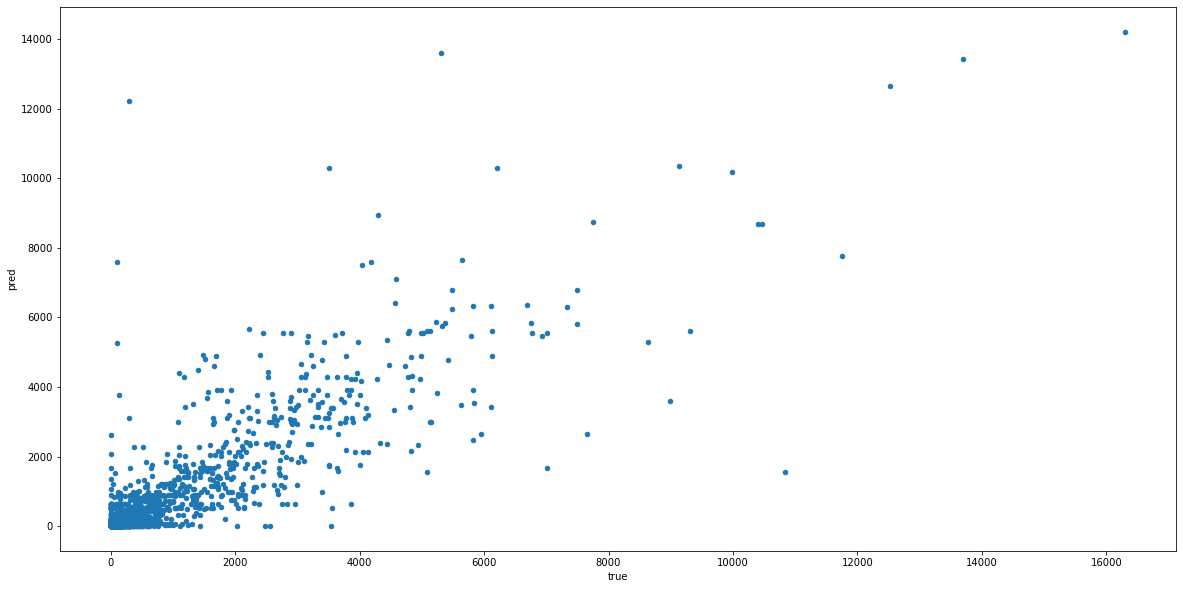

In [1069]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<AxesSubplot:>

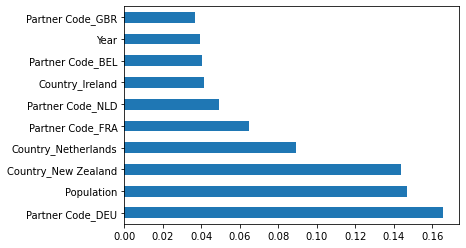

In [1070]:
(pd.Series(model_at_hand.feature_importances_, index=X_train_b.columns)
   .nlargest(10)
   .plot(kind='barh')) 

## Data for Model

In [1072]:
df_model = df_all.copy()

features_model  = ['rain','temp','wetb','dewpt','vappr','rhum','wdsp','vis','clht','clamt','day_of_week']
target_model  = 'CycleProportion'


features_model  = ['Year','Month', 'Country', 'Partner Code', 'Population']
# target_benchmark  = 'Value (k Euro)'
target_model  = 'Quantity (tonnes)'


In [1073]:
from sklearn.model_selection import train_test_split

X = df_model[features_model]
y = df_model[target_model]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [1074]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [1075]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
# print("Coefficients: \n", regr.coef_)

Coefficients: 
 [ 9.84064324e+00  6.80832497e-06 -6.31865390e+05 -6.31907981e+05
 -6.31814105e+05 -6.31897945e+05 -6.31886098e+05 -6.31845279e+05
 -6.31839063e+05 -6.31861535e+05 -6.31854503e+05 -6.31819201e+05
 -6.31854853e+05 -6.31892038e+05  3.43078439e+04  3.43451819e+04
  3.45042307e+04 -3.00018101e+04 -3.01684837e+04 -3.00846959e+04
 -2.98638844e+04 -2.98189012e+04 -3.02299360e+04 -2.98308830e+04
 -3.00835438e+04 -2.90491640e+04 -2.98967997e+04 -2.97492187e+04
 -2.83141472e+04 -3.00628916e+04 -3.10101205e+04 -2.99416383e+04
 -2.99088048e+04 -2.99807721e+04 -3.00825343e+04 -2.99826043e+04
 -2.99687372e+04 -3.00685933e+04 -3.00414473e+04 -2.99416756e+04
 -2.99605757e+04 -3.80340607e+04 -3.00866783e+04 -3.05122760e+04
 -2.99396124e+04 -2.99265883e+04 -3.00308451e+04 -2.98533677e+04
 -2.99602880e+04 -2.64952811e+04 -3.00577312e+04 -2.97686752e+04
 -3.01538996e+04 -3.01620528e+04 -3.00531437e+04 -2.99487164e+04
 -3.00701479e+04 -2.99334306e+04 -3.06106355e+04 -2.99655053e+04
 -2.99729

In [1076]:
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 249.9167814096957
mean_squared_error 462185.2354493407
root_mean_squared_error 679.8420665487984
r2 0.39488637579832975


<AxesSubplot:xlabel='true', ylabel='pred'>

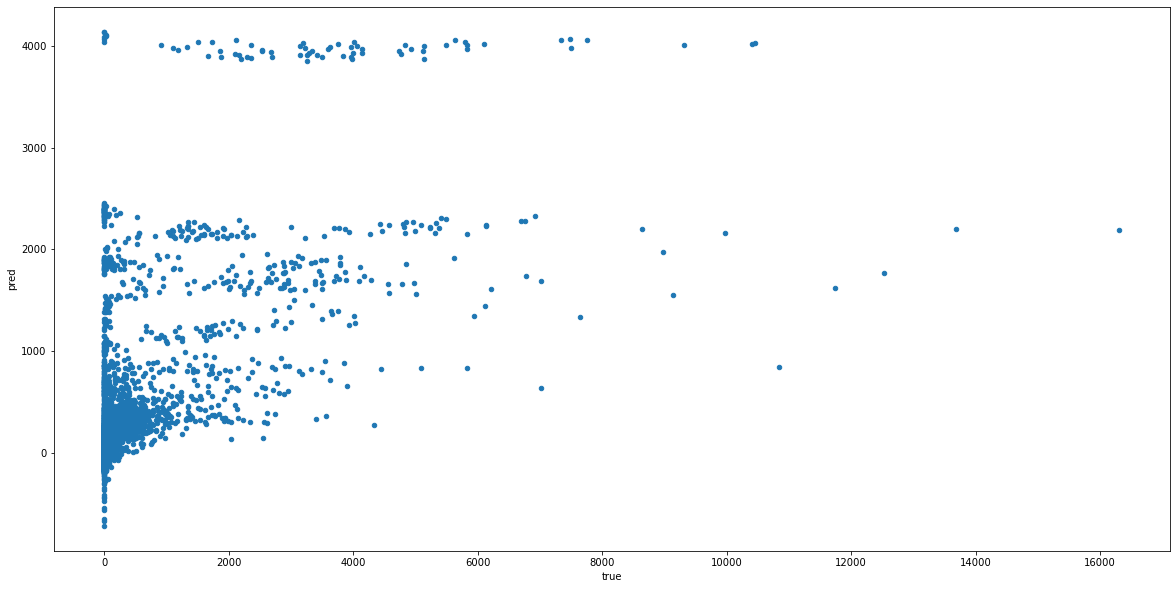

In [1077]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<AxesSubplot:>

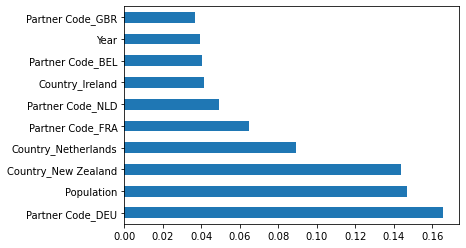

In [1078]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

## Random Forest

In [1079]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [1080]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 99.43879274658943
mean_squared_error 139409.12136104927
root_mean_squared_error 373.3753089868816
r2 0.8174793303564943


<AxesSubplot:xlabel='true', ylabel='pred'>

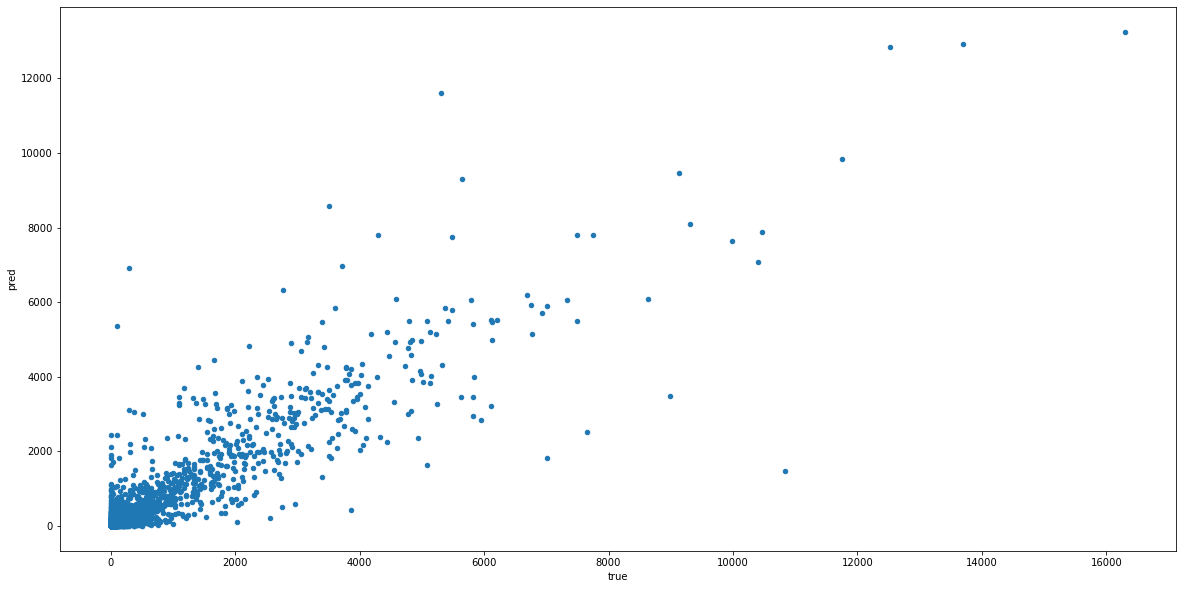

In [1081]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<AxesSubplot:>

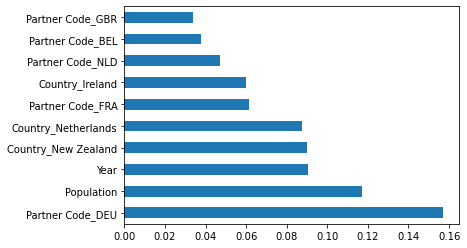

In [1082]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

## Gradient Boosting

In [1083]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [1085]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 173.33809510585778
mean_squared_error 225897.65292619908
root_mean_squared_error 475.28691642648766
r2 0.7042446686382604


<AxesSubplot:xlabel='true', ylabel='pred'>

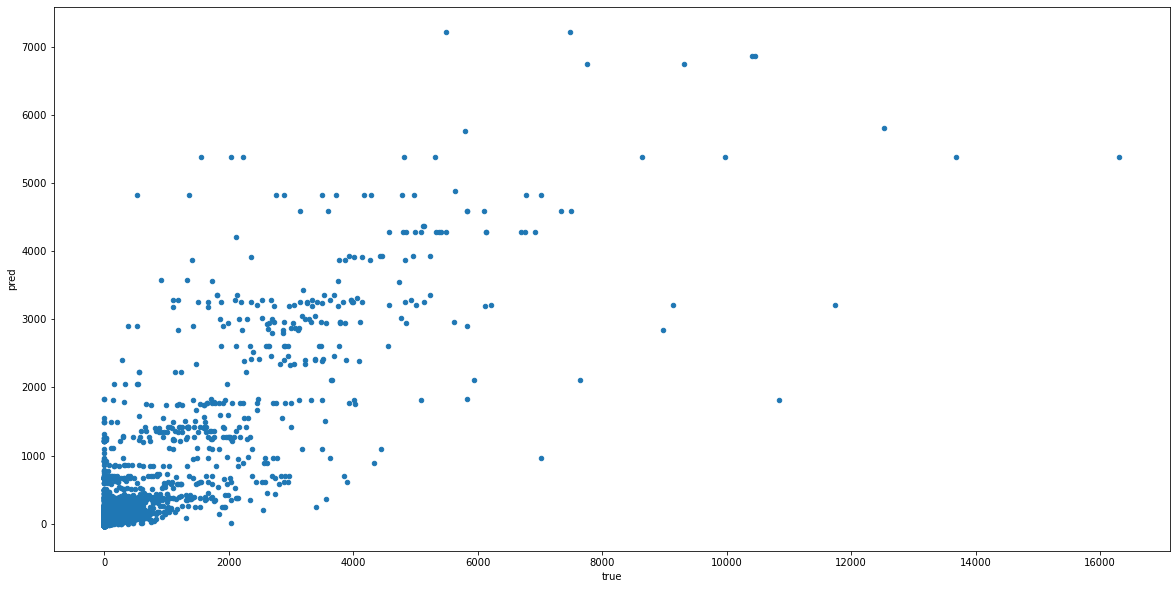

In [1086]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<AxesSubplot:>

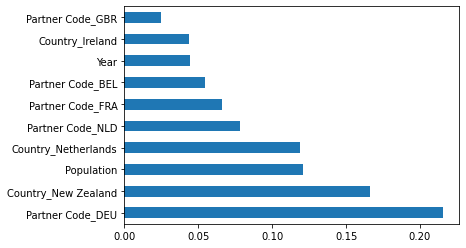

In [1087]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 